In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

<h4>Analyze the data for categorical variables</h4>

In [6]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


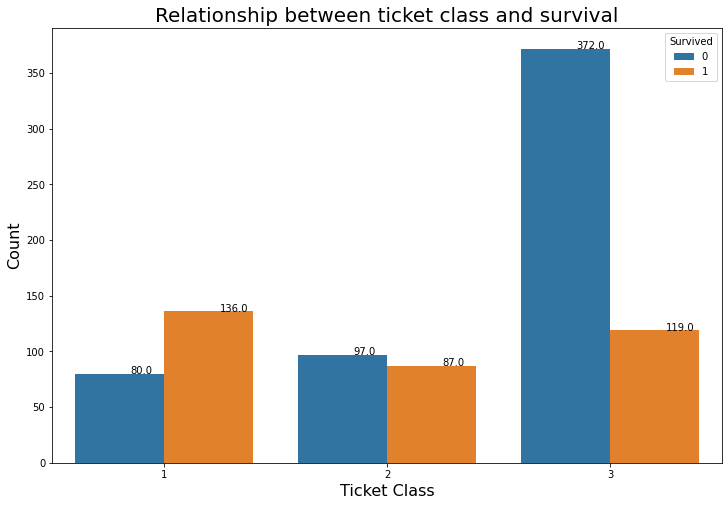

In [8]:
# Determine the relationship between the ticket class and survival outcome
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Pclass',
            hue = 'Survived',
            data = df)
 
plt.xlabel('Ticket Class', fontsize=16) 
plt.ylabel('Count', fontsize=16)
plt.title(label="Relationship between ticket class and survival", fontsize=20)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [9]:
df[['Pclass', 'Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


According to the graph above the third class (cheapest class) had the worst ratio of survival versus first and second class.
Simple put, you are more likely to die if you were in the regular class and more likely to survive in first class. Class is has a 34% positive correlation to survival; higher the class, higher the chances of survival.

In [10]:
df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


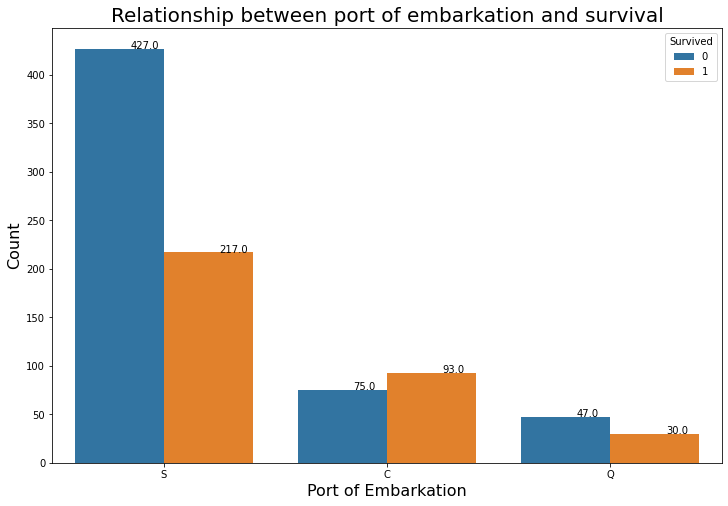

In [11]:
# Determine the relationship between port of embarkation and survival outcome
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Embarked',
            hue = 'Survived',
            data = df)
 
plt.xlabel('Port of Embarkation', fontsize=16) 
plt.ylabel('Count', fontsize=16)
plt.title(label="Relationship between port of embarkation and survival", fontsize=20)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Majority of the passengers embarked from Southampton, but around half did not survive. While survival was slightly more likely for passengers embarking from Cherbourg.

In [12]:
age_group = []

In [13]:
for age in df['Age']:
    if age > 0 and age < 2:
        age_group.append('infant')
    elif age > 2 and age < 12:
        age_group.append('child')
    elif age > 12 and age < 20:
        age_group.append('teen')
    elif age > 20 and age < 65:
        age_group.append('adult')
    elif age > 65:
        age_group.append('senior')
    else:
        age_group.append('unkown')
        
age_group = pd.DataFrame(age_group, columns=['AgeGroup'])
age_group.shape

(891, 1)

In [14]:
df2 = pd.concat([df,age_group], axis='columns')

In [15]:
df2['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


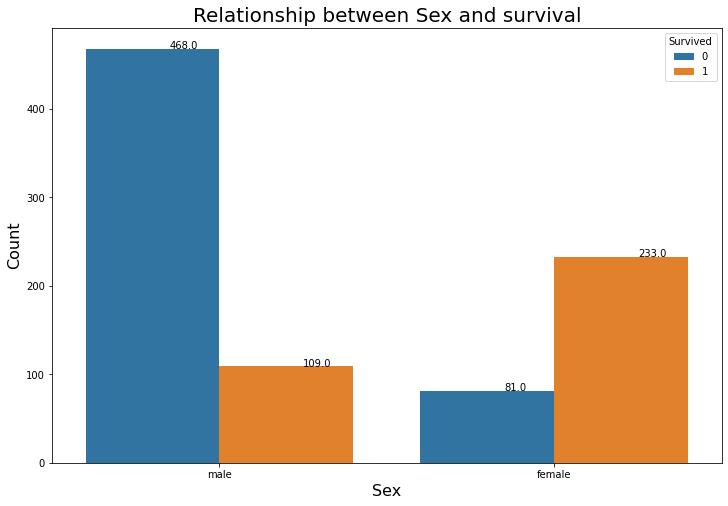

In [16]:
# Determine the relationship between sex and survival outcome
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Sex',
            hue = 'Survived',
            data = df2)

plt.xlabel('Sex', fontsize=16) 
plt.ylabel('Count', fontsize=16)
plt.title(label="Relationship between Sex and survival", fontsize=20)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<Figure size 864x576 with 0 Axes>

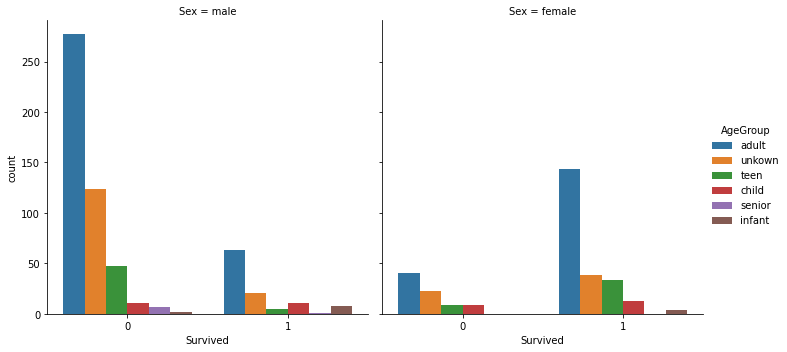

In [17]:
# Determine the relationship between sex and survival outcome
plt.figure(figsize=(12,8))
# ax = sns.countplot(x = 'Sex',
#             hue = 'Survived',
#             data = df2)

ax = sns.catplot(x="Survived", hue="AgeGroup", col="Sex",
                data=df2, kind="count")
plt.show()

In [18]:
# Show the number of survivals among the different sexes.

sex_pivot = pd.pivot_table(df, index='Survived', columns='Sex', values='Ticket', aggfunc='count', margins=True, margins_name='Total')

In [19]:
# Show the percentage of survival among the different sexes.

sex_pivot2 = pd.DataFrame(((sex_pivot.iloc[:][0:1].values/sex_pivot.iloc[:][2:3].values)*100), 
                  columns=sex_pivot.columns)
sex_pivot3 = pd.DataFrame(((sex_pivot.iloc[:][1:2].values/sex_pivot.iloc[:][2:3].values)*100), 
                  columns=sex_pivot.columns)

sex_pivot2 = sex_pivot2.round(2)
sex_pivot3 = sex_pivot3.round(2)

In [20]:
# Show the number of survivals among the different age groups.

agegroup_pivot = pd.pivot_table(df2, index='Survived', columns='AgeGroup', values='Ticket', aggfunc='count', margins=True, margins_name='Total')

In [21]:
# Show the percentage of survival among the different age groups.

agegroup_pivot2 = pd.DataFrame(((agegroup_pivot.iloc[:][0:1].values/agegroup_pivot.iloc[:][2:3].values)*100), 
                  columns=agegroup_pivot.columns)

agegroup_pivot3 = pd.DataFrame(((agegroup_pivot.iloc[:][1:2].values/agegroup_pivot.iloc[:][2:3].values)*100), 
                  columns=agegroup_pivot.columns)

agegroup_pivot2 = agegroup_pivot2.round(2)
agegroup_pivot3 = agegroup_pivot3.round(2)

In [22]:
display(sex_pivot, agegroup_pivot, sex_pivot3, agegroup_pivot3)

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


AgeGroup,adult,child,infant,senior,teen,unkown,Total
Survived,,,,,,,
0,317,20,2,7,56,147,549
1,207,24,12,1,39,59,342
Total,524,44,14,8,95,206,891


Sex,female,male,Total
0,74.2,18.89,38.38


AgeGroup,adult,child,infant,senior,teen,unkown,Total
0,39.5,54.55,85.71,12.5,41.05,28.64,38.38


- Survival rate is better among infants(ages 0-2) 85.7% and women 74.2% in general.
- 18.9% of the males survived.
- Senior citizens (age 65+) had a survival rate of 12.5%
- Age tends to be inversely proportional to survivability.

<h4>Analyze the data for numerical variables</h4>

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
pd.pivot_table(df, index='Survived', columns='Sex', values='Age', margins=True, margins_name='Total')

Sex,female,male,Total
Survived,,,
0,25.046875,31.618056,30.626179
1,28.847716,27.276022,28.343690
Total,27.915709,30.726645,29.699118


 - Average survial age is 29years old for female and 27years old for men

In [25]:
# Create list of all the numeric fields
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]

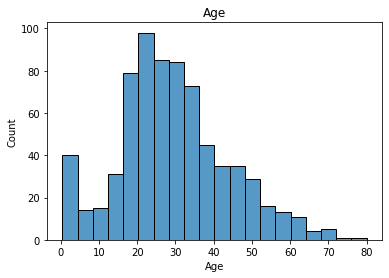

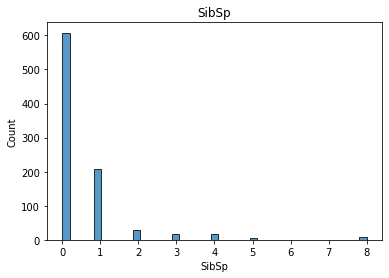

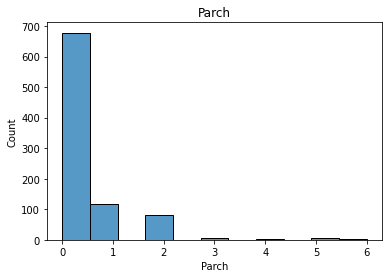

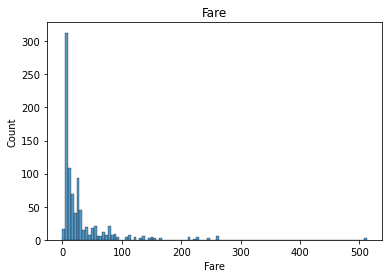

In [26]:
for i in df_num.columns:
    sns.histplot(data=df, x=i)
    plt.title(i)
    plt.show()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

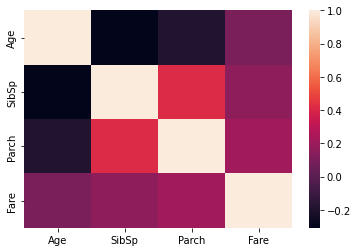

In [27]:
display(df_num.corr())
sns.heatmap(df_num.corr())

- As age increases the posibility of a sibling, spouse, parent or child being onboard decreases.
- As expected, and increase in fare correlates to an increase in the possibility that a sibling, spouse, parent or child is accompanying on board.
- Fare also has a positive correlation to age.

<h4>Additional Questions</h4>

- Did the captain survive?
- Whats the rate of survival for parents?
- Did name title affect survival rate?